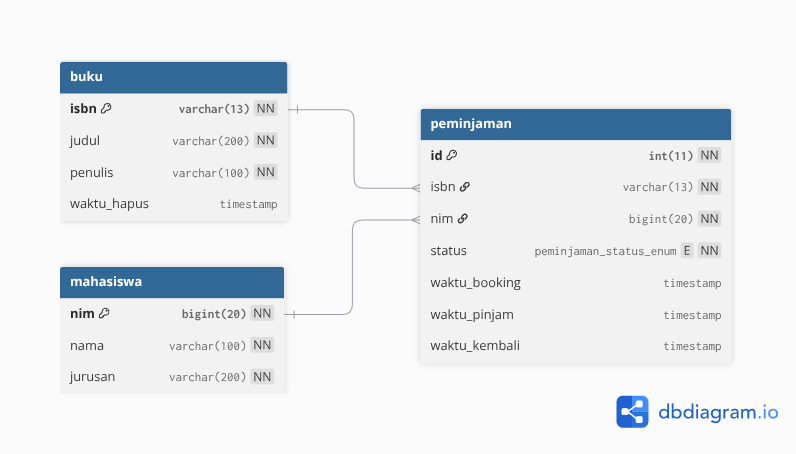

# Peminjaman Service API Documentation

## Base URL
```
http://localhost:5004
```

## 1. POST `/peminjaman`
### Description
Retrieve borrowing records. Supports filtering by `nim` and search keyword.

### Request Body (optional)
```json
{
  "nim": "123456",
  "s": "keyword" | null
}
```

In [ ]:
import requests

url = "http://localhost:5004/peminjaman"
payload = {"nim": "123456"}
print(requests.post(url, json=payload).json())

## 2. POST `/peminjaman/tambah`
### Description
Create a new borrowing record.

### Request Body
```json
{
  "nim": "123456",
  "isbn": "9781234567890"
}
```

In [ ]:
payload = {"nim": "123456", "isbn": "9781234567890"}
print(requests.post("http://localhost:5004/peminjaman/tambah", json=payload).json())

## 3. POST `/peminjaman/booking`
### Description
Create a booking request for a book.

### Request Body
```json
{
  "nim": "123456",
  "isbn": "9781234567890"
}
```

In [ ]:
payload = {"nim": "123456", "isbn": "9781234567890"}
print(requests.post("http://localhost:5004/peminjaman/booking", json=payload).json())

## 4. POST `/peminjaman/setujui-booking`
### Description
Approve a booking and convert it into borrowing.

### Request Body
```json
{ "id": 1 }
```

In [ ]:
print(requests.post("http://localhost:5004/peminjaman/setujui-booking", json={"id": 1}).json())

## 5. POST `/peminjaman/tolak-booking`
### Description
Reject a booking request.

### Request Body
```json
{ "id": 1 }
```

In [ ]:
print(requests.post("http://localhost:5004/peminjaman/tolak-booking", json={"id": 1}).json())

## 6. POST `/peminjaman/kembalikan`
### Description
Return a borrowed book.

### Request Body
```json
{ "id": 1 }
```

In [ ]:
print(requests.post("http://localhost:5004/peminjaman/kembalikan", json={"id": 1}).json())

## 7. DELETE `/peminjaman/hapus-booking`
### Description
Delete a booking by the owner.

### Query Params
- `id`
- `nim`

### Example
```
DELETE /peminjaman/hapus-booking?id=1&nim=123456
```

In [ ]:
print(requests.delete("http://localhost:5004/peminjaman/hapus-booking?id=1&nim=123456").json())

## 8. POST `/peminjaman/cek-pinjaman`
### Description
Check if a student still has unreturned books.

### Request Body
```json
{ "nim": "123456" }
```

In [ ]:
print(requests.post("http://localhost:5004/peminjaman/cek-pinjaman", json={"nim": "123456"}).json())

## Redis Events
This service publishes and consumes Redis events:

| Event | Description |
|------|-------------|
| `book_status_updated` | Sync book status |
| `book_added` | Sync new book |
| `book_updated` | Sync book update |
| `book_deleted` | Sync book delete |
| `mahasiswa_updated` | Sync mahasiswa data |

## Notes
- ISBN must be **13 digits**
- Book cannot be borrowed or booked twice
- Booking must be approved before borrowing
- Only booking owner can delete booking
- Redis ensures eventual consistency across services